# EXPLORATORY DATA ANALYSIS

In [1]:
# EDA oleh Tim Haha Iya Bang

import numpy as np # aljabar linear
import pandas as pd # data processing
import matplotlib.pyplot as plt # visualisasi data
import seaborn as sns # visualisasi data
%matplotlib inline

# Input data
data_lokasi = pd.read_csv("../input/catatan_lokasi.csv")
profil_karyawan = pd.read_csv("../input/data_profil.csv") 

In [2]:
print(data_lokasi.head(10))
print("ukuran data: "+ str(data_lokasi.shape))

   id   tanggal   lokasi_dominan
0   1  21/05/19    Jakarta Pusat
1   2  21/05/19  Kabupaten Bogor
2   3  21/05/19    Jakarta Pusat
3   4  21/05/19   Kota Tangerang
4   5  21/05/19       Kota Bogor
5   6  21/05/19       Kota Bogor
6   7  21/05/19       Kota Depok
7   8  21/05/19       Kota Depok
8   9  21/05/19       Kota Bogor
9  10  21/05/19    Jakarta Timur
ukuran data: (2600, 3)


Data pada *catatan_lokasi,csv* memiliki 3 kolom, yaitu:
* id : id dari karyawan
* tanggal : tanggal kejadian
* lokasi_dominan : lokasi dimana karyawan berada secara dominan dalam suatu hari

In [3]:
data_lokasi.iloc[:, 2].describe()

count           2600
unique            28
top       Kota Depok
freq             177
Name: lokasi_dominan, dtype: object

In [4]:
# ada 28 lokasi yang berbeda, oleh karena itu kami penasaran dengan lokasi-lokasi tersebut
data_lokasi.iloc[:, 2].unique()

array(['Jakarta Pusat', 'Kabupaten Bogor', 'Kota Tangerang', 'Kota Bogor',
       'Kota Depok', 'Jakarta Timur', 'Kota Bekasi', 'Jakarta Selatan',
       'Jakarta Utara', 'Jakarta Barat', 'Kabupaten Tangerang',
       'Kabupaten Bekasi', 'Kota Tangerang Selatan', 'Kota Yogyakarta',
       'Kabupaten Bantul', 'Kabupaten Wonogiri', 'Kota Medan',
       'Kota Manado', 'Kota Bandung', 'Kabupaten Tasikmalaya',
       'Kota Padang', 'Kabupaten Sleman', 'Kota Bandar Lampung',
       'Kota Semarang', 'Kabupaten Lampung Selatan', 'Kota Surabaya',
       'Kabupaten Kebumen', 'Kota Banda Aceh'], dtype=object)

In [5]:
data_lokasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
id                2600 non-null int64
tanggal           2600 non-null object
lokasi_dominan    2600 non-null object
dtypes: int64(1), object(2)
memory usage: 61.0+ KB


Tidak ditemukan data yang hilang pada *data_lokasi*

In [6]:
print(profil_karyawan.head(10))
print("ukuran data: "+ str(profil_karyawan.shape))

   id jenis_kelamin                 divisi  umur
0   1     Laki-laki       Customer Service    34
1   2     Laki-laki          Data Engineer    26
2   3     Laki-laki      Software Engineer    28
3   4     Perempuan  Business Intelligence    21
4   5     Perempuan      Software Engineer    21
5   6     Laki-laki  Business Intelligence    28
6   7     Perempuan      Software Engineer    21
7   8     Laki-laki       Customer Service    22
8   9     Perempuan  Business Intelligence    21
9  10     Laki-laki           Data Science    21
ukuran data: (100, 4)


Data pada *data_profil.csv* memilki 4 kolom, yaitu:
* id : id karyawan
* jenis_kelamin : gender karyawan
* divisi : divisi dari karyawan yang bekerja di TokoLapak
* umur : umur karyawan

In [7]:
print(profil_karyawan['umur'].describe())
print("Median Umur : "+str(profil_karyawan['umur'].median()))
print("----------------------------------------")
print(profil_karyawan.iloc[: , 1:3].describe())

count    100.000000
mean      27.660000
std        4.346646
min       21.000000
25%       24.000000
50%       27.000000
75%       32.000000
max       35.000000
Name: umur, dtype: float64
Median Umur : 27.0
----------------------------------------
       jenis_kelamin             divisi
count            100                100
unique             2                  6
top        Laki-laki  Software Engineer
freq              68                 31


Diketahui bahwa karyawan termuda berumur 21 tahun dan tertua berumur 35 tahun. Rata-rata umur karyawan adalah 27,66 tahun.
Lalu divisi yang paling banyak karyawannya adalah Software Engineer dengan jumlah karyawan sebanyak 31 orang. Karyawan laki-laki adalah mayoritas di TokoLapak dengan jumlah 68 orang.

In [8]:
profil_karyawan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
id               100 non-null int64
jenis_kelamin    100 non-null object
divisi           100 non-null object
umur             100 non-null int64
dtypes: int64(2), object(2)
memory usage: 3.2+ KB


Tidak ditemukan data yang hilang pada *profil_karyawan*

Saatnya untuk mengetahui perbandingan karyawan laki-laki dengan perempuan pada tiap-tiap divisi. Kita akan melakukan visualisasi data dengan menggunakan count plot.

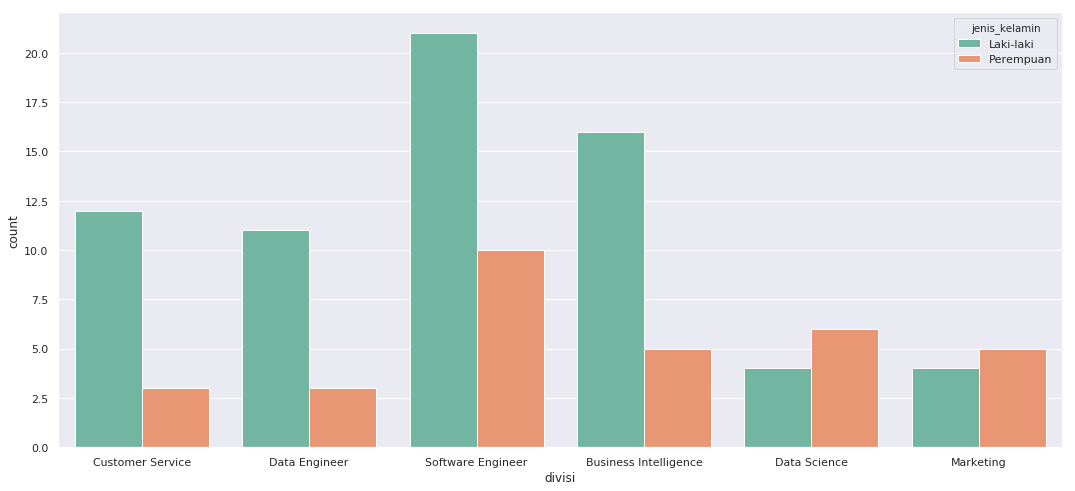

In [9]:
sns.set(style="darkgrid")
f, ax = plt.subplots(1,1,figsize=(18,8))
sns.countplot(x = 'divisi', data = profil_karyawan,hue = 'jenis_kelamin', palette = "Set2")
plt.show()

dari sini kita dapat memperoleh informasi, yaitu:
* karyawan di TokoLapak mayoritas adalah laki-laki
* hanya pada divisi Data Science dan divisi Marketing perempuang lebih banyak, meski selisih perempuan dan laki-laki tidak terlalu jauh
* divisi yang paling banyak karyawan laki-laki maupun perempuan adalah Software Engineer
* divisi yang paling sedikit karyawan perempuannya adalah Customer Service dan Data Engineer
* divisi yang paling sedikit karyawan laki-lainya adalah Data Science dan Marketing

Sekarang kita coba visualisasi persebaran umur karyawan pada tiap-tiap divisi.

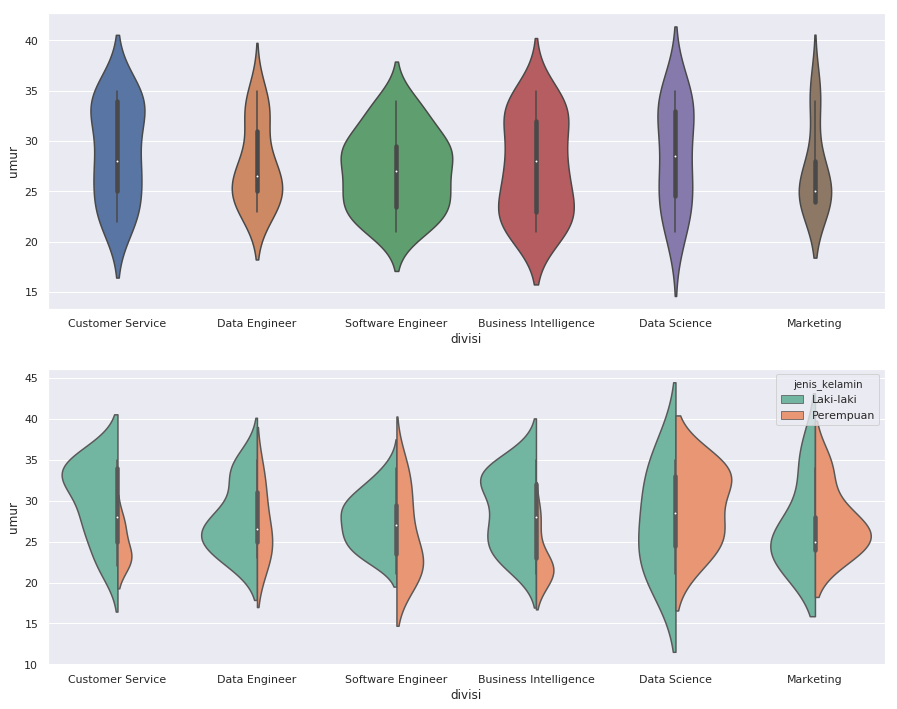

In [10]:
f, ax = plt.subplots(2,1,figsize=(15,12))
sns.violinplot(x = "divisi", y = "umur", data = profil_karyawan, split = True, scale = "count", ax = ax[0])
sns.violinplot(x = "divisi", y = "umur", data = profil_karyawan, split = True, 
               hue = "jenis_kelamin", scale = "count", palette = "Set2", ax = ax[1])

plt.show()

Violin plot di atas menunjukkan rentang usia dan persebaran usia yang dibagi berdasarkan divisi. Divisi customer service dan data scientist sebagian besar karyawannya berusia antara 30-35, sedangkan data engineer dan marketing didominasi oleh tenaga muda berusia sekitar 25 tahun, untuk divisi lainnya cukup seimbang dalam usia.

Jika kita melihat dari sisi jenis kelamin, maka dapat disimpulkan untuk laki-laki pada divisi Customer Service banyak yang memiliki umur di atas 30. Sementara untuk Data Engineer banyak laki-laki yang berusia di bawah 30 tahun. Pada divisi Data Science umur laki-laki cukup merata.
Untuk perempuan sendiri hampir semua divisi didominasi oleh perempuan yang masih berusia di bawah 30 tahun. Hanya pada divisi Data Science usia di bawah 30 dan di atas 30 hampir seimbang jumlahnya. 

Sekarang kita juga coba eksplorasi karyawan termuda dan tertua di setiap divisi

In [11]:
divisi = profil_karyawan.iloc[:,2].unique()
for d in divisi:
    tertua = max(profil_karyawan.iloc[:, 3][profil_karyawan.divisi == d])
    termuda = min(profil_karyawan.iloc[:, 3][profil_karyawan.divisi == d])
    
    print("Divisi {:25}: Tertua = {} Tahun, Termuda = {} Tahun".format(d, tertua, termuda))

Divisi Customer Service         : Tertua = 35 Tahun, Termuda = 22 Tahun
Divisi Data Engineer            : Tertua = 35 Tahun, Termuda = 23 Tahun
Divisi Software Engineer        : Tertua = 34 Tahun, Termuda = 21 Tahun
Divisi Business Intelligence    : Tertua = 35 Tahun, Termuda = 21 Tahun
Divisi Data Science             : Tertua = 35 Tahun, Termuda = 21 Tahun
Divisi Marketing                : Tertua = 35 Tahun, Termuda = 24 Tahun


Sejauh ini kita sudah memperoleh beberapa data. Sekarang kita akan eksplorasi *data_lokasi* untuk memperoleh informasi lebih banyak.

Di sini kita akan membagi 2 lokasi besar, yaitu wilayah JABODETABEK dan Non-Jabodetabek untuk mengetahui kondisi kedua wilayah ini setiap harinya

In [12]:
# mengambil urutan tanggal
tanggal =  []
for t in data_lokasi["tanggal"]:
    if t not in tanggal: tanggal.append(t)

jabodetabek = ['Jakarta Pusat', 'Kabupaten Bogor', 'Kota Tangerang', 'Kota Bogor', 
               'Kota Depok', 'Jakarta Timur', 'Kota Bekasi', 'Jakarta Selatan', 
               'Jakarta Utara', 'Jakarta Barat', 'Kabupaten Tangerang', 'Kabupaten Bekasi', 
               'Kota Tangerang Selatan']

karyawanLuarKota = []
karyawanDalamKota = []

for t in tanggal:
    # menghitung karyawan yang pergi ke luar kota maupun tidak
    cntLK = cntDK = 0 
    
    for lokasi in data_lokasi.lokasi_dominan[data_lokasi["tanggal"] == t]:
        if lokasi in jabodetabek: cntDK += 1
        else: cntLK += 1
    
    karyawanLuarKota.append(cntLK)
    karyawanDalamKota.append(cntDK)

# menggabungkan beberapa DataFrame
df1 = pd.DataFrame(karyawanLuarKota, columns = ['Jumlah Di Luar Kota'])
df2 = pd.DataFrame(karyawanDalamKota, columns = ['Jumlah Di Dalam Kota'])
df3 = pd.DataFrame(tanggal, columns = ['Tanggal'])

data_jumlah = pd.merge(df1, df2, left_index = True, right_index= True)
data_jumlah = pd.merge(df3, data_jumlah, left_index = True, right_index= True)
print(data_jumlah)
print("------------------------------------------------------------")
print(data_jumlah.describe())

     Tanggal  Jumlah Di Luar Kota  Jumlah Di Dalam Kota
0   21/05/19                    0                   100
1   22/05/19                    0                   100
2   23/05/19                    3                    97
3   24/05/19                    2                    98
4   25/05/19                    2                    98
5   26/05/19                    5                    95
6   27/05/19                    5                    95
7   28/05/19                    9                    91
8   29/05/19                   19                    81
9   30/05/19                   34                    66
10  31/05/19                   58                    42
11  01/06/19                   73                    27
12  02/06/19                   83                    17
13  03/06/19                   93                     7
14  04/06/19                   91                     9
15  05/06/19                   91                     9
16  06/06/19                   91               

Sekarang kita akan plot data tersebut dalam bentuk graph

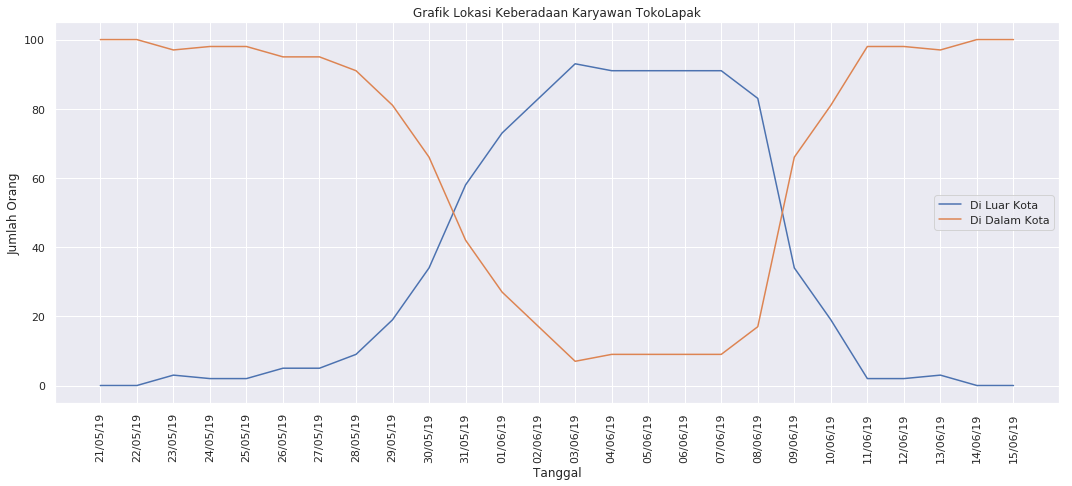

In [13]:
fig, ax = plt.subplots(1,1, figsize= (18,7))
ax.plot(data_jumlah["Tanggal"], data_jumlah.iloc[:,1], label = 'Di Luar Kota')
ax.plot(data_jumlah["Tanggal"], data_jumlah.iloc[:,2], label = 'Di Dalam Kota')
plt.xticks(rotation=90)
plt.legend(loc='best')

ax.set(xlabel='Tanggal', ylabel='Jumlah Orang',
       title='Grafik Lokasi Keberadaan Karyawan TokoLapak')

plt.show()

Selanjutnya kita akan mencari tahu jumlah kunjungan tiap-tiap lokasi yang ada pada data kita. Di sini kita akan menganggap orang yang sebelumnya berada di lokasi yang sama dengan yang sekarang sebagai suatu kunjungan.

In [14]:
lokasi = sorted(['Jakarta Pusat', 'Kabupaten Bogor', 'Kota Tangerang', 'Kota Bogor',
       'Kota Depok', 'Jakarta Timur', 'Kota Bekasi', 'Jakarta Selatan',
       'Jakarta Utara', 'Jakarta Barat', 'Kabupaten Tangerang',
       'Kabupaten Bekasi', 'Kota Tangerang Selatan', 'Kota Yogyakarta',
       'Kabupaten Bantul', 'Kabupaten Wonogiri', 'Kota Medan',
       'Kota Manado', 'Kota Bandung', 'Kabupaten Tasikmalaya',
       'Kota Padang', 'Kabupaten Sleman', 'Kota Bandar Lampung',
       'Kota Semarang', 'Kabupaten Lampung Selatan', 'Kota Surabaya',
       'Kabupaten Kebumen', 'Kota Banda Aceh'])

jumlah_kunjungan = []
for l in lokasi:
    jumlah_kunjungan.append(len(data_lokasi.lokasi_dominan[data_lokasi.lokasi_dominan == l]))
    
df1 = pd.DataFrame(lokasi, columns = ["Lokasi"])
df2 = pd.DataFrame(jumlah_kunjungan, columns = ["Total Kunjungan"])

data_kunjungan = pd.merge(df1, df2, left_index= True, right_index = True)
data_kunjungan = data_kunjungan.sort_values("Total Kunjungan", ascending = False)
print(data_kunjungan)
print("-------------------------------------------------")
print(data_kunjungan.describe())

                       Lokasi  Total Kunjungan
19                 Kota Depok              177
17                Kota Bekasi              165
3               Jakarta Timur              163
0               Jakarta Barat              155
18                 Kota Bogor              155
1               Jakarta Pusat              145
25             Kota Tangerang              127
6            Kabupaten Bekasi              122
10           Kabupaten Sleman              120
27            Kota Yogyakarta              117
26     Kota Tangerang Selatan              116
2             Jakarta Selatan              105
4               Jakarta Utara              100
7             Kabupaten Bogor               98
21                 Kota Medan               85
22                Kota Padang               81
11        Kabupaten Tangerang               79
13         Kabupaten Wonogiri               71
5            Kabupaten Bantul               68
9   Kabupaten Lampung Selatan               61
15        Kot

Kita sekarang dapat melihat data total kunjungan tiap-tiap lokasi setiap harinya yang sudah terurut menurun. Sekarang kita akan visualisasikan datanya dengan bar plot.

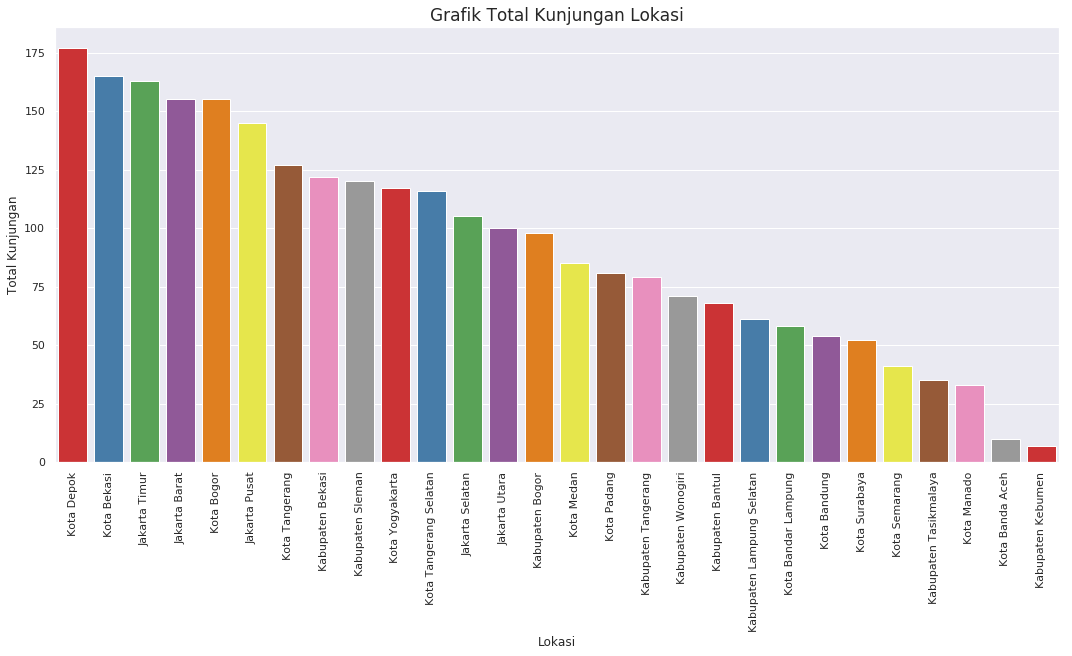

In [15]:
f, ax = plt.subplots(1,1,figsize=(18,8))
ax = sns.barplot(x = 'Lokasi', y = "Total Kunjungan" ,data = data_kunjungan, palette = "Set1")
ax.set_title('Grafik Total Kunjungan Lokasi', size = 17)
plt.xticks(rotation=90)
plt.show()

Bar Plot di atas mengilustrasikan banyaknya kunjungan ke masing-masing kota yang ada dalam data. Overall, kunjungan terbanyak didominasi oleh kota-kota JABODETABEK, terutama Depok yang menempati peringkat 1 dan Bekasi di peringkat 2. Kota Kebumen menempati posisi terendah, dengan total kunjungan kurang dari 25.

Kenapa bisa JABODETABEK kunjungannya lebih banyak?
Pertama, karena letak kantor TokoLapak berada di sana. Tentu berdampak pada total kunjungan. Kedua, Jabodetabek itu tahun selalu dipadati perantau dari daerah, sehingga JABODETABEK sepi ketika musim mudik dan ramai saat musim kerja (yang semestinya periodenya lebih lama dari musim mudik). Ketiga, perbedaan waktu berangkat mudik juga memengaruhi banyaknya kunjungan ke JABODETABEK

Setelah kita eksplorasi dari segi lokasi, sekarang kita juga akan eksplorasi dari sisi karyawannya. Kita akan mencari tahu lokasi kampung halaman tempat karyawan mudik dengan penjelasan sebagai berikut:
> Pada "Grafik Lokasi Keberadaan Karyawan TokoLapak" sebelumnya, kita dapat melihat ada 2 titik potong. Dimana itu menyatakan bahwa tanggal di antara 2 titik potong tersebut menandakan para karyawan banyak yang pergi ke luar kota alias mudik. Maka kita dapat mencari tahu kampung halaman mereka dengan menggunakan modus data yang berada dalam rentang tanggal 31 Mei - 8 Juni 2019.

In [16]:
from collections import Counter

# mengambil data dari tanggal 31 Mei - 8 Juni 2019
data_mudik = data_lokasi.iloc[1000:1900 , :]
lokasi_mudik = []

for ID in range(1,101):
    lokasi_karyawan = list(data_mudik.lokasi_dominan[data_mudik.id == ID])
    modus = Counter(lokasi_karyawan).most_common(1)
    
    lokasi_mudik.append(modus[0][0])
    
ID = range(1,101)

df = list(zip(ID, lokasi_mudik))
data_lokasi_mudik = pd.DataFrame(df, columns = ["ID", "Lokasi Mudik"])
data_lokasi_mudik

,ID,Lokasi Mudik
0,1,Kota Padang
1,2,Kota Manado
2,3,Kota Padang
3,4,Kota Bandar Lampung
4,5,Kota Yogyakarta
5,6,Kabupaten Sleman
6,7,Kota Medan
7,8,Kota Semarang
8,9,Kota Padang
9,10,Kota Yogyakarta


Sekarang kita sudah mengetahui masing-masing kampung halaman tempat para karyawan mudik. Di sini kami berasumsi bahwa pada data di atas apabila ada karyawan yang masih di Jabodetabek, maka dia tidak pulang ke kampung halamannya (atau bisa jadi kampung halamannya memang di Jabodetabek). Selanjutnya kita juga akan coba menghitung persentase karyawan yang mudik dan tidak mudik (ke luar Jabodetabek dan di dalam Jabodetabek)

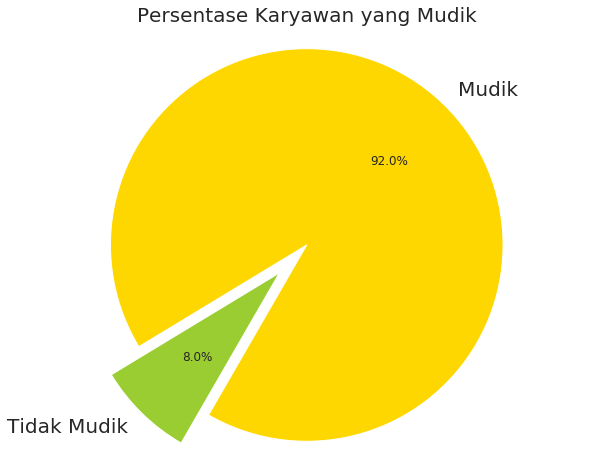

In [17]:
jabodetabek = ['Jakarta Pusat', 'Kabupaten Bogor', 'Kota Tangerang', 'Kota Bogor', 
               'Kota Depok', 'Jakarta Timur', 'Kota Bekasi', 'Jakarta Selatan', 
               'Jakarta Utara', 'Jakarta Barat', 'Kabupaten Tangerang', 'Kabupaten Bekasi', 
               'Kota Tangerang Selatan']

persentase = [0.0,0.0] # kiri untuk yang di luar Jabodetabek, kanan sebaliknya

for l in data_lokasi_mudik["Lokasi Mudik"]:
    if l in jabodetabek: 
        persentase[1] += 1
    else:
        persentase[0] += 1

labels = "Mudik", "Tidak Mudik"

fig, ax = plt.subplots(1,1, figsize = (10, 8))
patches, texts, autotexts = ax.pie(persentase, explode=(0.1,0.1), labels = labels, 
                                   autopct='%1.1f%%', startangle=240, colors = ["gold", "yellowgreen"])
texts[0].set_fontsize(20)
texts[1].set_fontsize(20)
ax.set_title("Persentase Karyawan yang Mudik", size = 20)
ax.axis('equal')

plt.show()

Terlihat di sini yang mudik alias ke luar kota sebanyak 92%. Artinya hampir semua karyawan di TokoLapak adalah perantau. Sekarang kita juga akan melihat frekuensi masing-masing lokasi terhadap karyawan, Dengan begitu kita akan tahu daerah mana yang paling banyak perantaunya yang bekerja di TokoLapak.

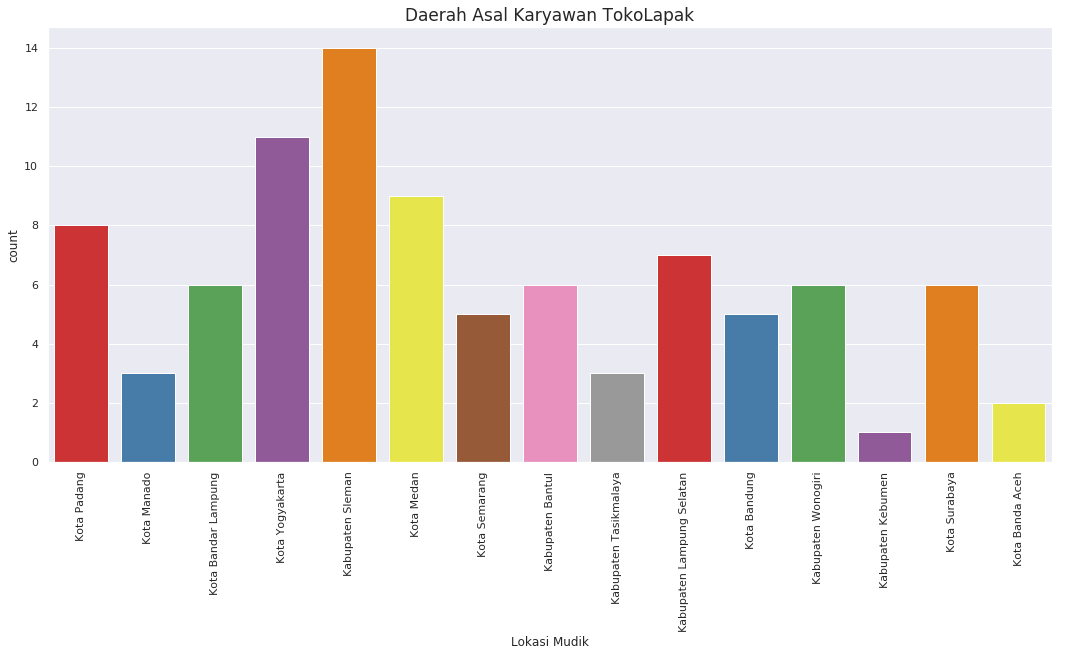

In [18]:
# Kita akan hilangkan data lokasi yang berada di kawasan Jabodetabek agar mendapatkan data Non-Jabodetabek
jabodetabek = ['Jakarta Pusat', 'Kabupaten Bogor', 'Kota Tangerang', 'Kota Bogor', 
               'Kota Depok', 'Jakarta Timur', 'Kota Bekasi', 'Jakarta Selatan', 
               'Jakarta Utara', 'Jakarta Barat', 'Kabupaten Tangerang', 'Kabupaten Bekasi', 
               'Kota Tangerang Selatan']

df = data_lokasi_mudik
lokasi = list(data_lokasi_mudik.iloc[:, 1])

for l in list(data_lokasi_mudik.iloc[:, 1]):
    if l in jabodetabek:
        df = df.drop(df.index[lokasi.index(l)])
        lokasi.pop(lokasi.index(l))
        
f, ax = plt.subplots(1,1,figsize=(18,8))
sns.countplot(x = 'Lokasi Mudik', data = df, palette = "Set1")
plt.xticks(rotation = 90)
ax.set_title("Daerah Asal Karyawan TokoLapak", size = 17)
plt.show()

Bar plot diatas mengilustrasikan banyaknya karyawan yang berkampung halaman di kota-kota di Pulau Jawa, Pulau Sumatera, dan Pulau Sulawesi. Overall, sebagian besar karyawan berkampung halaman di Sleman dengan jumlah karyawan sebanyak 14, disusul di posisi kedua yaitu Yogyakarta dengan lebih dari 10 karyawan. Sementara Kabupaten Kebumen menempati posisi terendah, dengan kurang dari 2 karyawan.

Setelah kita mengetahui lokasi mudik masing-masing karyawan, kita jadi bisa mencari informasi total karyawan yang pergi mudik setiap harinya.

In [19]:
# mengambil urutan tanggal
tanggal =  []
for t in data_lokasi["tanggal"]:
    if t not in tanggal: tanggal.append(t)
        
total_pemudik = []
for t in tanggal:
    cnt = 0
    hari = 1
    df = list(data_lokasi.lokasi_dominan[data_lokasi["tanggal"] == t])
    for n in range(1,101):
        if df[n-1] == list(data_lokasi_mudik["Lokasi Mudik"])[n-1]:
            cnt +=1
    total_pemudik.append(cnt)
    hari += 1
    
df1 = pd.DataFrame(tanggal, columns = ['Tanggal'])
df2 = pd.DataFrame(total_pemudik, columns = ['Total Pemudik'])
pemudik = pd.merge(df1,df2,right_index= True, left_index = True)

print(pemudik)

     Tanggal  Total Pemudik
0   21/05/19              2
1   22/05/19              3
2   23/05/19              5
3   24/05/19              2
4   25/05/19              3
5   26/05/19              4
6   27/05/19              9
7   28/05/19              8
8   29/05/19             17
9   30/05/19             33
10  31/05/19             61
11  01/06/19             76
12  02/06/19             84
13  03/06/19             93
14  04/06/19             99
15  05/06/19             99
16  06/06/19             99
17  07/06/19             99
18  08/06/19             84
19  09/06/19             33
20  10/06/19             17
21  11/06/19              3
22  12/06/19              2
23  13/06/19              5
24  14/06/19              3
25  15/06/19              2


Sekarang kita dapat mengetahui jumlah orang yang diperkirakan pergi ke kampung halamannya pada tanggal tertentu (termasuk dengan menganggap orang yang tetap di jabodetabek saat waktu mudik berarti kampung halamannya di Jabodetabek).

# KESIMPULAN
Kesimpulannya, perusahaan TokoLapak memiliki 100 karyawan yang memiliki usia, divisi, dan kampung halaman yang berbeda-beda. Dilihat berdasarkan usia, divisi customer service dan data scientist sebagian besar karyawannya berusia antara 30-35, sedangkan data engineer dan marketing didominasi oleh tenaga muda berusia sekitar 25 tahun, untuk divisi lainnya cukup seimbang dalam usia. Sementara, jika kita lihat *data_lokasi*, sejak awal periode, terjadi penguatan trend untuk karyawan yang mudik, hal ini dikonfirmasi dengan adanya titik potong antara jumlah karyawan yang mudik dan jumlah karyawan yang masih di jabodetabek antara tanggal 30 Mei 2019 dan 31 Mei 2019, hingga akhirnya mencapai nilai tertinggi pada tanggal 3 Mei 2019, kemudian diikuti dengan kestabilan tren hingga terjadinya penurunan yang dimulai pada tanggal 8 Juni yang kemudian diikuti dengan adanya titik potong antara tanggal 08 Juni 2019 hingga 09 Juni 2019 yang memvalidasi terjadinya trend negatif (downward trend) untuk jumlah karyawan yang berada di kampung halaman. Dilihat dari persebaran kampung halaman karyawan, dapat dilihat bahwa pulau Jawa mendominasi, disusul oleh pulau Sumatera pada urutan kedua, dan Sulawesi pada urutan ketiga.
